In [8]:
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"

def show_corr(df, formula=None):
    fig, ax = plt.subplots(figsize=(10,5), ncols=1, nrows=1)
    sns.pairplot(df, size=1.2, aspect=1.5)
    
    sns.heatmap(df.corr(), cmap="seismic", annot=True, ax=ax)
    
    if formula is None:
        formula = 'next_fp ~ dome + wind + precipitation + temperature'
    y, X = patsy.dmatrices(formula, data=RB_df, return_type="dataframe")
    model = sm.OLS(y, X)
    fit = model.fit()
    return fit.summary()

In [9]:
seasons = "2014-2017"
weather_cols = ('next_fp', 'fp', 'temperature','wind','precipitation','dome')

RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons)).loc[:,weather_cols]
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons)).loc[:,weather_cols]

# RB

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.107
Date:                Fri, 20 Jul 2018   Prob (F-statistic):             0.0774
Time:                        19:48:59   Log-Likelihood:                -10578.
No. Observations:                3193   AIC:                         2.117e+04
Df Residuals:                    3188   BIC:                         2.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2255      0.519     21.631      0.000      10.208      12.243
dome              0.3898      0.362      1.076      0.282      -0.321       1.100
wind             -0.0145      0.050     -0.287      0.774      -0.113       0.085
precipitation     0.9563      0.548      1.745      0.081      -0.118       2.031
temperature      -0.0147      0.008     -1.866      0.062      -0.030       0.001
==============================================================================
Omnibus:                      721.965   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1456.915
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

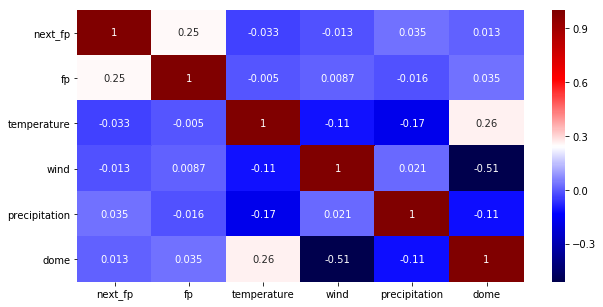

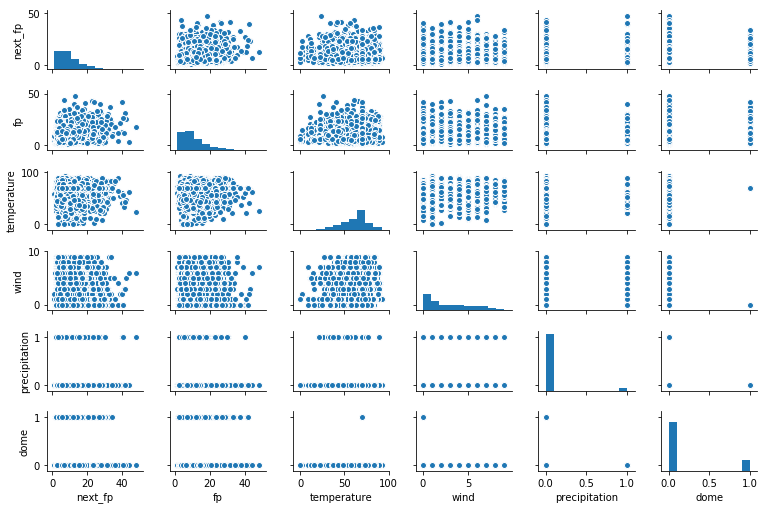

In [10]:
show_corr(RB_df)

# WR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.107
Date:                Fri, 20 Jul 2018   Prob (F-statistic):             0.0774
Time:                        19:49:47   Log-Likelihood:                -10578.
No. Observations:                3193   AIC:                         2.117e+04
Df Residuals:                    3188   BIC:                         2.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2255      0.519     21.631      0.000      10.208      12.243
dome              0.3898      0.362      1.076      0.282      -0.321       1.100
wind             -0.0145      0.050     -0.287      0.774      -0.113       0.085
precipitation     0.9563      0.548      1.745      0.081      -0.118       2.031
temperature      -0.0147      0.008     -1.866      0.062      -0.030       0.001
==============================================================================
Omnibus:                      721.965   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1456.915
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

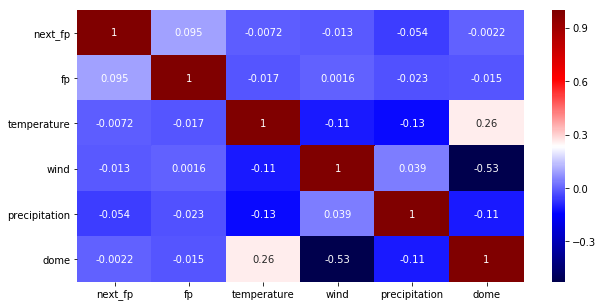

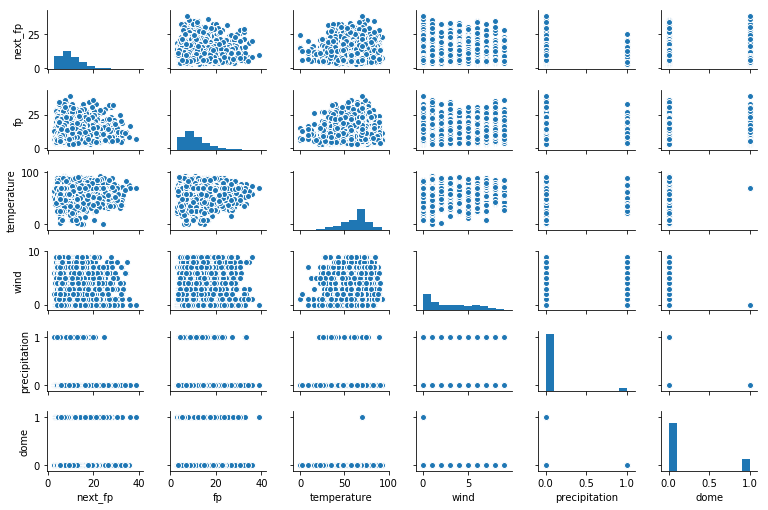

In [11]:
show_corr(WR_df)

# All

In [ ]:
RB_df['WR'] = 0
WR_df['WR'] = 1

show_corr(pd.concat([RB_df, WR_df]))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.107
Date:                Fri, 20 Jul 2018   Prob (F-statistic):             0.0774
Time:                        19:51:47   Log-Likelihood:                -10578.
No. Observations:                3193   AIC:                         2.117e+04
Df Residuals:                    3188   BIC:                         2.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2255      0.519     21.631      0.000      10.208      12.243
dome              0.3898      0.362      1.076      0.282      -0.321       1.100
wind             -0.0145      0.050     -0.287      0.774      -0.113       0.085
precipitation     0.9563      0.548      1.745      0.081      -0.118       2.031
temperature      -0.0147      0.008     -1.866      0.062      -0.030       0.001
==============================================================================
Omnibus:                      721.965   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1456.915
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""